# III. 🤖 Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['sql', 'java', 'python']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.0,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['databricks', 'aws']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",112889,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


#### Feature Engineering

Making a new dataframe with relevant features for the regression model

In [3]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,4.0,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,112889
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


Dropping some states and company industries that have below 5 data points.

In [4]:
jobstate_count = df_model['job_state'].value_counts()
jobstate_count

Remote          100
TX               71
CA               39
GA               30
NJ               28
NY               23
MA               22
IL               21
VA               21
DC               19
NC               15
FL               13
PA               12
OH               12
MN               12
CO                9
WA                8
WI                7
OR                7
MD                7
DE                5
TN                5
AZ                4
MI                4
CT                4
SC                4
UT                4
MO                3
MS                2
Oregon            2
Pennsylvania      2
California        2
AR                2
Minnesota         2
ID                1
Arizona           1
Ohio              1
Texas             1
IN                1
ME                1
AL                1
Manhattan         1
KY                1
NE                1
Illinois          1
KS                1
OK                1
IA                1
Name: job_state, dtype: int64

In [5]:
states_g5 = jobstate_count[jobstate_count > 5].index.tolist()

df_model = df_model[df_model["job_state"].isin(states_g5)]
df_model['job_state'].value_counts()

Remote    100
TX         71
CA         39
GA         30
NJ         28
NY         23
MA         22
IL         21
VA         21
DC         19
NC         15
FL         13
MN         12
PA         12
OH         12
CO          9
WA          8
WI          7
MD          7
OR          7
Name: job_state, dtype: int64

One Hot Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 0, 15,  7,  6,  4, 16,  8, 11, 17, 10,  2, 19,  5, 13, 14, 12,  1,
        9,  3, 18])

In [8]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [9]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 1, 0])

In [10]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([32,  7, 16, 60, 31, 35, 30, 17, 36,  0, 10, 23, 25, 52,  5, 57,  3,
       51, 42,  2, 50,  6, 44, 26, 22,  1, 59, 19, 38, 18, 15, 46, 43, 45,
       54, 20, 41, 56, 12, 40, 47, 58, 29, 33, 27, 34, 53, 14, 28,  9, 11,
       49,  4, 55, 48, 39, 37, 21, 13, 24,  8])

In [11]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 2. , 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
       4.7, 4.8, 4.9, 5. ])

In [12]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([26, 23, 21, 29,  6, 17, 27, 20,  0, 10, 14, 19, 24, 22, 11,  5, 15,
       28,  7, 18, 25, 16, 13,  9, 12,  1,  8,  4,  3,  2], dtype=int64)

In [13]:
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 3, 0, 2])

In [14]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,0,0,2,1,32,26,70000
2,15,0,1,1,7,23,121500
3,0,0,2,4,16,21,112889
4,7,0,0,3,60,29,117000
5,6,0,0,0,31,6,94536


<Axes: >

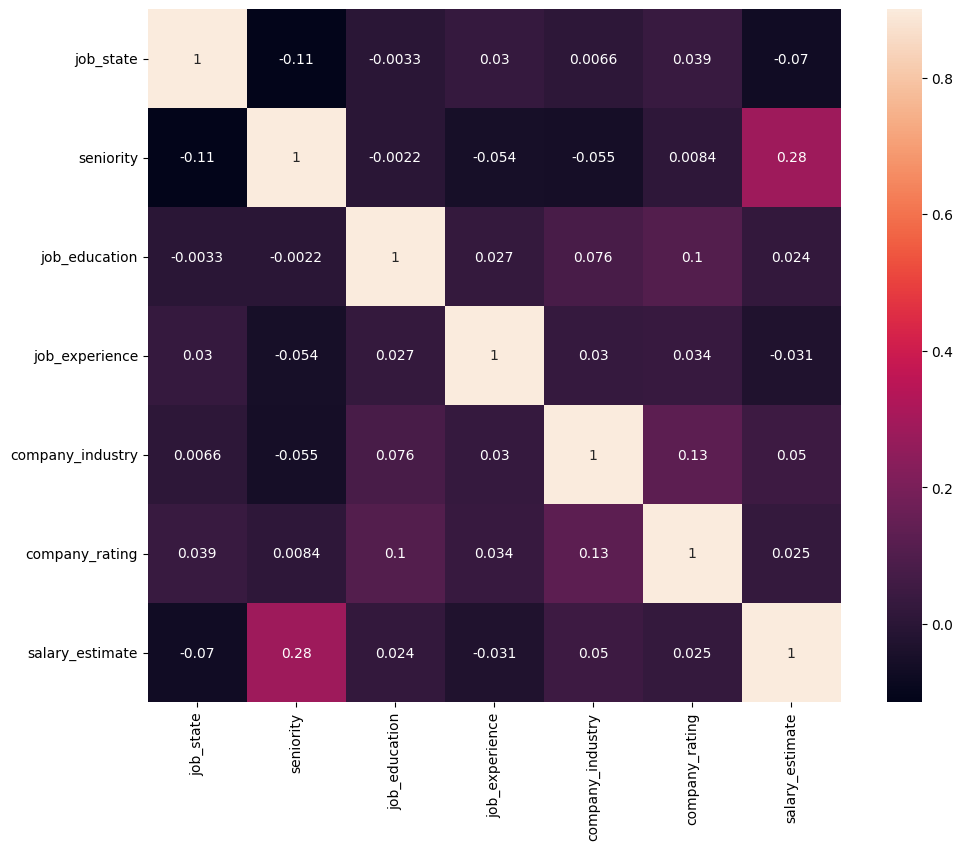

In [15]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

### Multiple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = model.predict(X_test)

In [22]:
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $14829.81


In [23]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error))   

Error : $18,917.77


### Random Forest Regressor Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [26]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [27]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Mean Absolute Error : $14407.67
Error : $18,462.39


In [28]:
errors = abs(y_pred - y_test)

In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 86.48 %


Training the model on all the dataset so we can export it and use it in production

In [30]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

Variable Importances

In [31]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: seniority            Importance: 0.59
Variable: company_industry     Importance: 0.21
Variable: job_state            Importance: 0.12
Variable: company_rating       Importance: 0.05
Variable: job_experience       Importance: 0.03
Variable: job_education        Importance: 0.0


[None, None, None, None, None, None]

Let's test our model on an example

In [32]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [33]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 0.,  1.,  0.,  1., 32., 24.]])

In [34]:
y_pred = regressor.predict(X_example)
y_pred[0]

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


121065.34854253828

For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $126,070 /year.

Exporting the model to a pickle file

In [35]:
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

Let's test our model after importing it from the pickle file

In [36]:
with open('../models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [37]:
y_pred = regressor_loaded.predict(X_example)
y_pred[0].round()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


121065.0